<a href="https://colab.research.google.com/github/arthurcisbran/Projeto-de-Extens-o---Bigdata-e-Python/blob/main/Projeto_Faculdade_PYTHON_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tratando os dados recebidos:

In [ ]:
import pandas as pd

# Carregar o arquivo ODS (Open Document Spreadsheet)
file_path = 'LEVANTAMENTO GERAL.ods'
df = pd.read_excel(file_path, engine='odf')

# 1. Tratar valores ausentes: Preencher valores nulos com "N/A"
df.fillna('N/A', inplace=True)

# 2. Renomear colunas para padronização
df.rename(columns={
    'PRIORIDADE': 'prioridade',
    'MODELO DO PNEU': 'modelo_pneu',
    'QTD': 'quantidade',
    'VIATURA A SER EMPREGADO': 'viatura_empregado',
    'EB / PLACA': 'eb_placa',
    'DOT': 'dot',
    'OM': 'om'
}, inplace=True)

# 3. Converter a coluna 'prioridade' para inteiro, tratando valores não numéricos
df['prioridade'] = pd.to_numeric(df['prioridade'], errors='coerce').fillna(0).astype(int)

# 4. Salvar o DataFrame tratado em um novo arquivo CSV
treated_file_path = 'levantamento_geral_tratado.csv'
df.to_csv(treated_file_path, index=False)

# 5. Exibir as primeiras linhas do DataFrame tratado
print(df.head())


ImportError: Missing optional dependency 'odfpy'.  Use pip or conda to install odfpy.

Criando o DataFrame com os dados fornecidos

<ipython-input-3-97a70ce8babb>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='modelo_pneu', y='quantidade', data=df, palette='viridis')


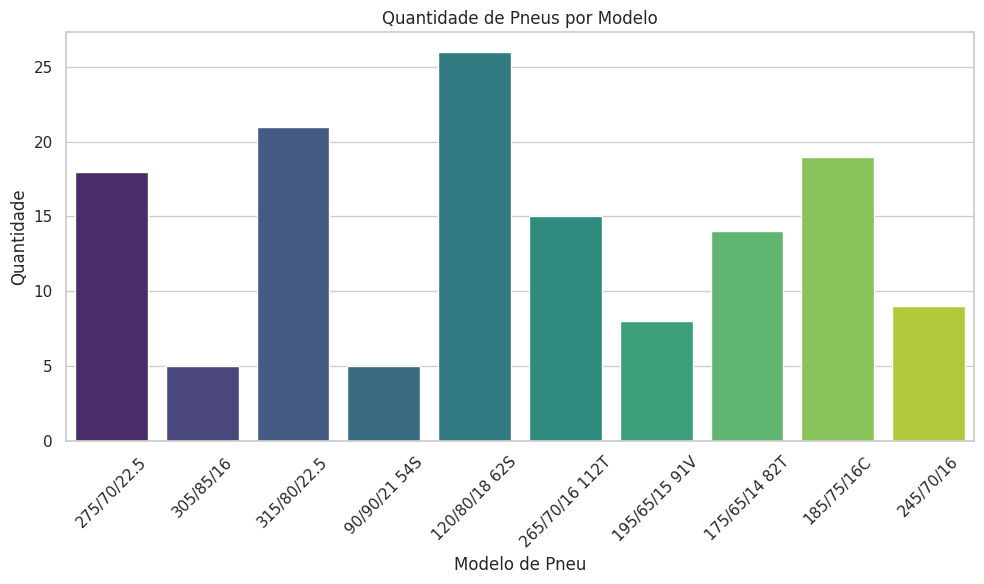

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criando o DataFrame com os dados fornecidos
data = {
    "modelo_pneu": ["275/70/22.5", "305/85/16", "315/80/22.5", "90/90/21 54S", "120/80/18 62S",
                    "265/70/16 112T", "195/65/15 91V", "175/65/14 82T", "185/75/16C", "245/70/16"],
    "quantidade": [18, 5, 21, 5, 26, 15, 8, 14, 19, 9],
    "dot": ["122L4684", "16XE2373", "562L8125", "29BE3916", "97AE7969",
            "34BE5312", "48XE2390", "62AE4873", "211W7039", "382L9834"],
    "data_inclusao": ["2024-03-25", "2024-04-26", "2024-06-07", "2023-10-21", "2023-10-08",
                      "2024-02-11", "2023-12-22", "2024-01-15", "2023-09-14", "2024-05-03"]
}

df = pd.DataFrame(data)

# Convertendo a coluna 'data_inclusao' para o formato de data
df['data_inclusao'] = pd.to_datetime(df['data_inclusao'])

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando a quantidade de pneus por modelo de pneu
plt.figure(figsize=(10, 6))
sns.barplot(x='modelo_pneu', y='quantidade', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Quantidade de Pneus por Modelo')
plt.xlabel('Modelo de Pneu')
plt.ylabel('Quantidade')
plt.tight_layout()

# Exibir o gráfico
plt.show()

1. Gráfico de Barras – Quantidade de Pneus por Modelo (Pedidos vs. Estoque)

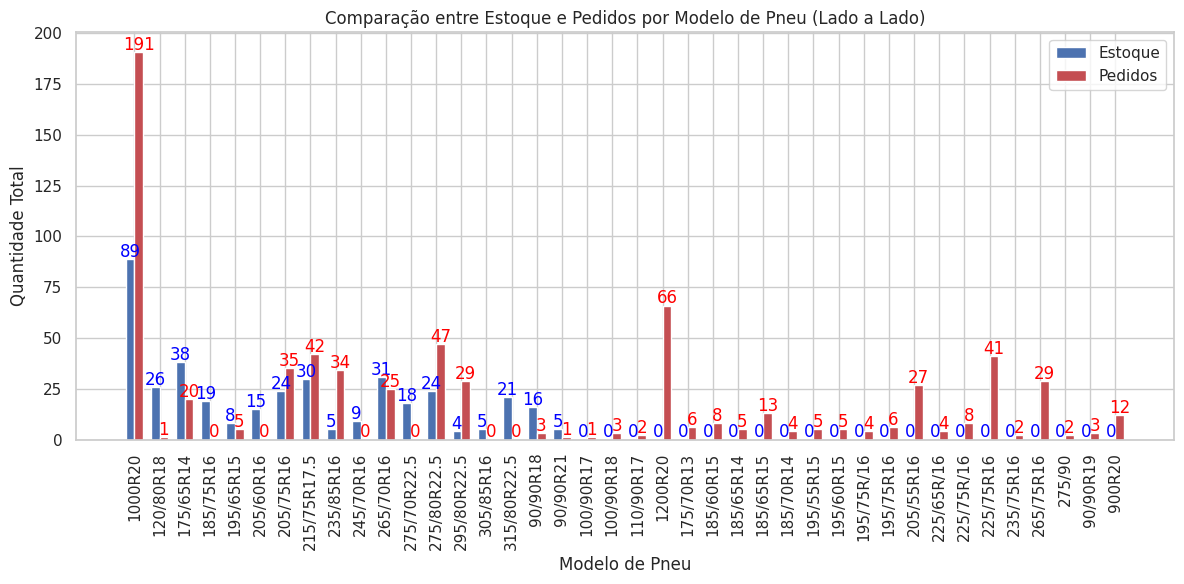

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df_estoque = pd.read_csv('estoque.csv')
df_pedidos = pd.read_csv('pedidos.csv')

# Padronizar e agrupar os dados por modelo de pneu
df_estoque.columns = df_estoque.columns.str.strip().str.lower()
df_pedidos.columns = df_pedidos.columns.str.strip().str.lower()
df_estoque['modelo_pneu'] = df_estoque['modelo_pneu'].str.strip()
df_pedidos['modelo_pneu'] = df_pedidos['modelo_pneu'].str.strip()

# Agrupar as quantidades por modelo de pneu
df_estoque_agrupado = df_estoque.groupby('modelo_pneu')['quantidade'].sum().reset_index()
df_pedidos_agrupado = df_pedidos.groupby('modelo_pneu')['quantidade'].sum().reset_index()

# Unir os dados de estoque e pedidos
df_combinado = pd.merge(df_estoque_agrupado, df_pedidos_agrupado, on='modelo_pneu', how='outer', suffixes=('_estoque', '_pedidos')).fillna(0)

# Definir o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Definir o espaçamento entre as barras
bar_width = 0.35
indices = np.arange(len(df_combinado))

# Plotar as barras para o estoque e pedidos lado a lado
plt.bar(indices - bar_width/2, df_combinado['quantidade_estoque'], bar_width, label='Estoque', color='b')
plt.bar(indices + bar_width/2, df_combinado['quantidade_pedidos'], bar_width, label='Pedidos', color='r')

# Adicionar os números em cima de cada barra
for i in range(len(df_combinado)):
    plt.text(indices[i] - bar_width/2, df_combinado['quantidade_estoque'].iloc[i] + 1, int(df_combinado['quantidade_estoque'].iloc[i]), ha='center', color='blue')
    plt.text(indices[i] + bar_width/2, df_combinado['quantidade_pedidos'].iloc[i] + 1, int(df_combinado['quantidade_pedidos'].iloc[i]), ha='center', color='red')

# Adicionar rótulos e título
plt.xticks(indices, df_combinado['modelo_pneu'], rotation=90)
plt.title('Comparação entre Estoque e Pedidos por Modelo de Pneu')
plt.xlabel('Modelo de Pneu')
plt.ylabel('Quantidade Total')
plt.legend()

# Ajustar o layout
plt.tight_layout()
plt.show()


2. Gráfico de Linhas – Tendência de Pedidos ao Longo do Tempo

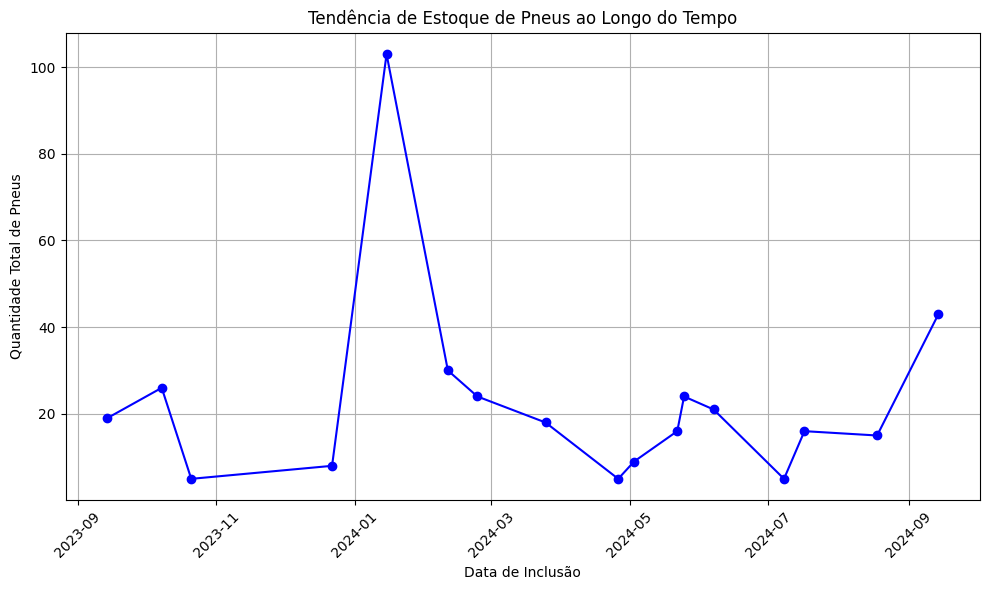

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo
df_estoque = pd.read_csv('estoque.csv')

# Garantir que a coluna 'data_inclusao' esteja no formato datetime
df_estoque['data_inclusao'] = pd.to_datetime(df_estoque['data_inclusao'], errors='coerce')

# Agrupar os dados por data de inclusão e somar as quantidades de pneus
df_tendencia_estoque = df_estoque.groupby('data_inclusao')['quantidade'].sum().reset_index()

# Criar o gráfico de linha mostrando a tendência de estoque ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_tendencia_estoque['data_inclusao'], df_tendencia_estoque['quantidade'], marker='o', linestyle='-', color='b')

# Adicionar rótulos e título
plt.title('Tendência de Estoque de Pneus ao Longo do Tempo')
plt.xlabel('Data de Inclusão')
plt.ylabel('Quantidade Total de Pneus')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Exibir o gráfico
plt.show()


3. Heatmap – Demanda de Pneus por OM (Organização Militar)

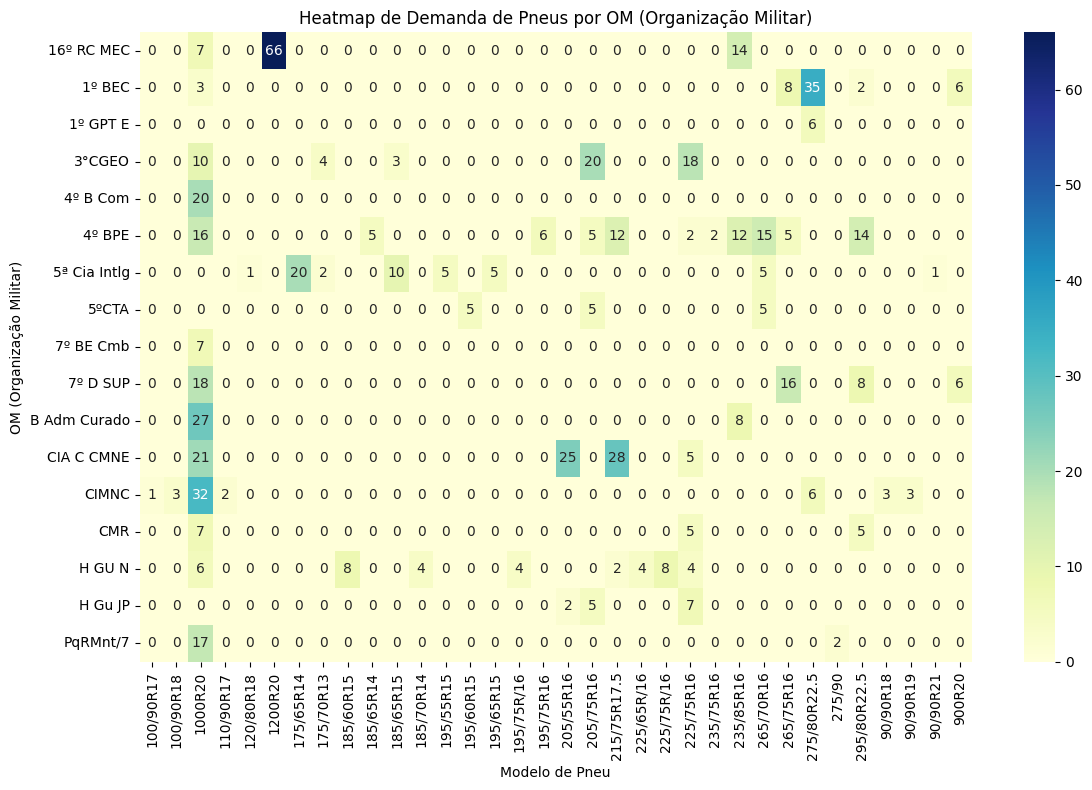

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo de pedidos
df_pedidos = pd.read_csv('pedidos.csv')

# Padronizar a coluna 'om' para garantir consistência
df_pedidos['om'] = df_pedidos['om'].str.strip()

# Agrupar os dados por 'om' e 'modelo_pneu', somando as quantidades
df_heatmap = df_pedidos.groupby(['om', 'modelo_pneu'])['quantidade'].sum().unstack().fillna(0)

# Criar o heatmap usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, cmap="YlGnBu", annot=True, fmt="g")

# Adicionar título e rótulos
plt.title('Heatmap de Demanda de Pneus por OM (Organização Militar)')
plt.xlabel('Modelo de Pneu')
plt.ylabel('OM (Organização Militar)')
plt.tight_layout()

# Exibir o gráfico
plt.show()
